***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE.

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados|
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [2]:
df = pd.read_csv('/content/dados.csv')

### Visualize o conteúdo do DataFrame

In [3]:
df.head(10)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
5,11,1,34,8,12,790,1.637906
6,11,0,57,8,12,3150,1.570078
7,11,1,60,8,12,1700,1.608495
8,11,1,50,4,14,1800,1.780329
9,11,0,26,8,12,1150,1.793203


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [4]:

classes = [0, 1576, 3940, 11820, 19700, 200000]
classes = np.sort(classes)

### 2º Definir os labels das classes

In [5]:
labels = ['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [6]:
frequencia = pd.value_counts(
  pd.cut(x = df.Renda,
         bins = classes,
         labels = labels,
         include_lowest = True)
)
frequencia

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [7]:
percentual = pd.value_counts(
  pd.cut(x = df.Renda,
         bins = classes,
         labels = labels,
         include_lowest = True),
  normalize = True
)
percentual

E    0.647514
D    0.242087
C    0.094235
B    0.010698
A    0.005466
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [8]:
df_personalizado = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual * 100}
)
df_personalizado.sort_index(ascending = False)

,Frequência,Porcentagem (%)
A,420,0.546590
B,822,1.069755
C,7241,9.423477
D,18602,24.208745
E,49755,64.751432


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

<Figure size 1000x600 with 0 Axes>

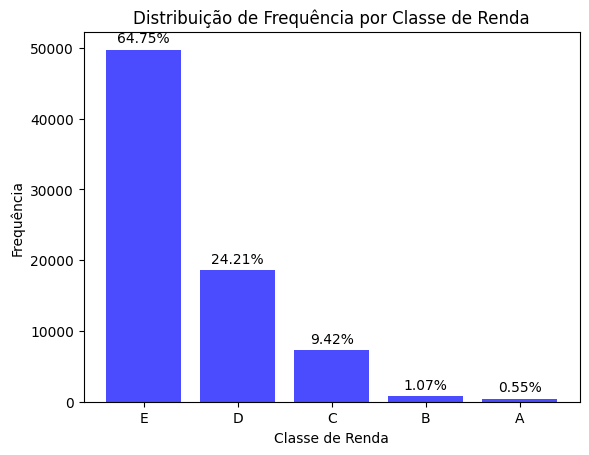

<Figure size 1000x600 with 0 Axes>

In [9]:
plt.title('Distribuição de Frequência por Classe de Renda')
plt.xlabel('Classe de Renda')
plt.ylabel('Frequência')
plt.bar(df_personalizado.index, df_personalizado['Frequência'], color='blue', alpha=0.7, label='Frequência')
for i in range(len(df_personalizado.index)):
    plt.text(df_personalizado.index[i], df_personalizado['Frequência'][i] + 1000, f"{df_personalizado['Porcentagem (%)'][i]:.2f}%", ha='center')
plt.figure(figsize=(10, 6))


In [10]:
quantidade_zeros = (df['Renda'] == 0).sum()
quantidade_zeros

2867

> ### Conclusões

**Distribuição da renda:** A maior parte da população possui renda classificada nas classes D e E, que correspondem a faixas de renda mais baixas, representando 24.21% e 64.75% da população, respectivamente. Isso indica uma distribuição desigual da renda, com a maioria das pessoas concentradas em faixas de renda mais baixas.

**Pouca representatividade nas classes A e B:** As classes A e B, que representam faixas de renda mais altas, têm uma porcentagem muito baixa de representatividade na população, com apenas 0.55% e 1.07%, respectivamente. Isso sugere que uma pequena parcela da população tem uma renda muito alta em comparação com a maioria.

**Renda igual a zero:** É importante notar que uma parte significativa da população, representando 2867 pessoas, possui uma renda igual a zero. Isso pode indicar desemprego, inatividade econômica ou outras condições socioeconômicas desfavoráveis para essa parcela da população.

**Desigualdade de renda: **A distribuição da renda mostra uma desigualdade significativa na sociedade, com a maioria das pessoas concentradas em faixas de renda mais baixas, enquanto uma pequena parcela desfruta de uma renda muito alta.


### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

In [11]:
idade = df['Anos de Estudo'].value_counts()
idade.head(60)

12    20848
16    10795
9      7980
5      6729
1      5849
6      4499
4      2891
8      2689
7      2445
11     2118
3      2101
10     1840
13     1836
15     1388
2      1388
14     1253
17      191
Name: Anos de Estudo, dtype: int64

### Histograma da Idade

<Figure size 1200x600 with 0 Axes>

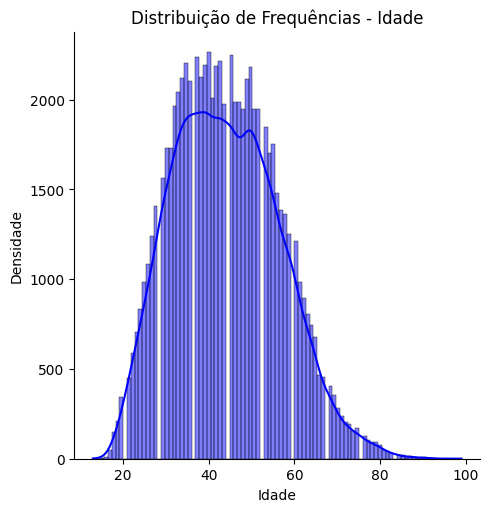

In [12]:
plt.figure(figsize=(12, 6))
sns.displot(df['Idade'], kde=True, color='blue')
plt.title('Distribuição de Frequências - Idade')
plt.xlabel('Idade')
plt.ylabel('Densidade')
plt.show()

### Histograma dos Anos de Estudo

<Figure size 1200x600 with 0 Axes>

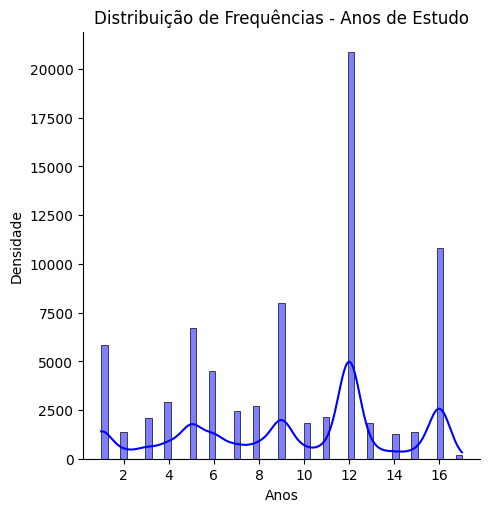

In [13]:
plt.figure(figsize=(12, 6))
sns.displot(df['Anos de Estudo'], kde=True, color='blue')
plt.title('Distribuição de Frequências - Anos de Estudo')
plt.xlabel('Anos')
plt.ylabel('Densidade')
plt.show()

> ### Conclusões

### **Idade**

**Picos de frequência:** Os dois picos de frequência mais proeminentes estão em torno das idades de 30 e 45 anos, respectivamente. Isso sugere que há uma concentração significativa de pessoas nessas faixas etárias.

**Decaimento gradual:** À medida que nos afastamos dos picos de frequência, a quantidade de pessoas em cada faixa etária diminui gradualmente, formando uma distribuição que se assemelha a uma curva de sino invertida.

**Extremidades da distribuição:** Nas extremidades da distribuição, ou seja, nas idades mais jovens (como 18 anos) e mais velhas (como 77 anos), a quantidade de pessoas é consideravelmente menor. Isso é esperado, pois as idades mais extremas geralmente têm menos representatividade na população geral.

### **Anos de Estudo**

**Educação básica predominante:** A maioria dos entrevistados tem uma quantidade relativamente baixa de anos de estudo, concentrando-se principalmente na faixa de 1 a 6 anos de estudo. Isso sugere que a educação básica é mais comum entre os entrevistados.

**Diminuição da frequência com anos de estudo mais altos:** À medida que o número de anos de estudo aumenta, a quantidade de entrevistados diminui. Isso é esperado, já que o acesso à educação superior ou especializada é geralmente mais limitado em comparação com a educação básica.

**Picos de frequência:** Os picos de frequência mais proeminentes estão em torno de 12 anos de estudo e 16 anos de estudo. Isso sugere que a educação secundária (12 anos) e, em menor medida, a educação superior (16 anos) são comuns entre os entrevistados.

**Poucos entrevistados com educação avançada:** Há um número muito menor de entrevistados com mais de 16 anos de estudo, o que pode indicar que a educação avançada ou especializada é menos comum na amostra de entrevistados.

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

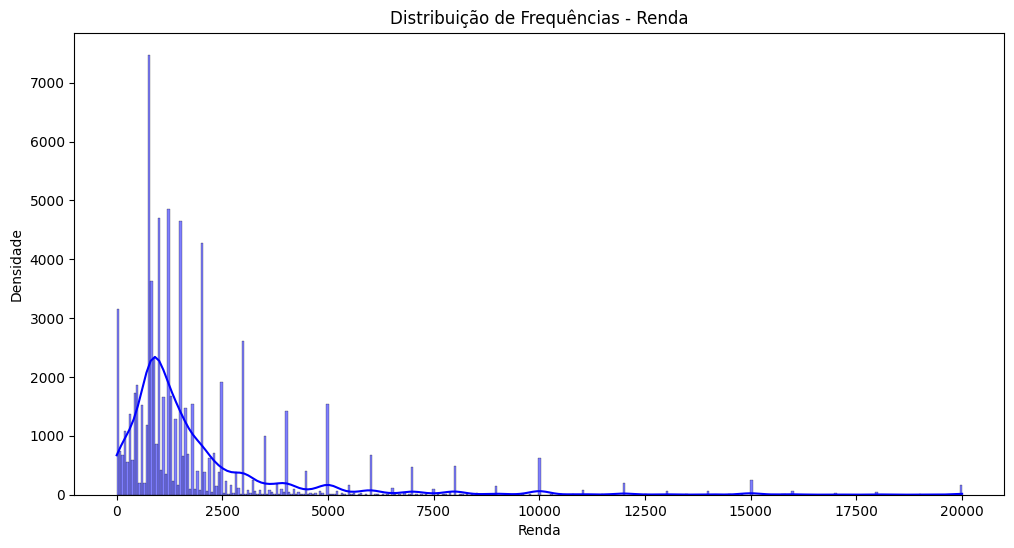

In [14]:
df_filtrado = df[df['Renda'] <= 20000]

plt.figure(figsize=(12, 6))
sns.histplot(df_filtrado['Renda'], kde=True, color='blue')
plt.title('Distribuição de Frequências - Renda')
plt.xlabel('Renda')
plt.ylabel('Densidade')
plt.show()

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [15]:
sexo = {
    0: 'Masculino',
    1: 'Feminino'
}
cor = {
    0: 'Indígena',
    2: 'Branca',
    4: 'Preta',
    6: 'Amarela',
    8: 'Parda',
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano',
    2: '1 ano',
    3: '2 anos',
    4: '3 anos',
    5: '4 anos',
    6: '5 anos',
    7: '6 anos',
    8: '7 anos',
    9: '8 anos',
    10: '9 anos',
    11: '10 anos',
    12: '11 anos',
    13: '12 anos',
    14: '13 anos',
    15: '14 anos',
    16: '15 anos ou mais',
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia',
    12: 'Acre',
    13: 'Amazonas',
    14: 'Roraima',
    15: 'Pará',
    16: 'Amapá',
    17: 'Tocantins',
    21: 'Maranhão',
    22: 'Piauí',
    23: 'Ceará',
    24: 'Rio Grande do Norte',
    25: 'Paraíba',
    26: 'Pernambuco',
    27: 'Alagoas',
    28: 'Sergipe',
    29: 'Bahia',
    31: 'Minas Gerais',
    32: 'Espírito Santo',
    33: 'Rio de Janeiro',
    35: 'São Paulo',
    41: 'Paraná',
    42: 'Santa Catarina',
    43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul',
    51: 'Mato Grosso',
    52: 'Goiás',
    53: 'Distrito Federal'
}

In [16]:
tabela_frequencias = pd.crosstab(df['Sexo'].map(sexo), df['Cor'].map(cor))

total_por_sexo = tabela_frequencias.sum(axis=1)
total_por_cor = tabela_frequencias.sum(axis=0)
percentuais_cruzados = (tabela_frequencias.div(total_por_sexo, axis=0) * 100).round(2)

tabela_frequencias.rename(index=sexo, columns=cor, inplace=True)
percentuais_cruzados.rename(index=sexo, columns=cor, inplace=True)

tabela_frequencias

Cor,Amarela,Branca,Indígena,Parda,Preta
Sexo,,,,,
Feminino,117,9621,101,10862,2889
Masculino,235,22194,256,25063,5502


In [17]:
percentuais_cruzados

Cor,Amarela,Branca,Indígena,Parda,Preta
Sexo,,,,,
Feminino,0.50,40.78,0.43,46.04,12.25
Masculino,0.44,41.68,0.48,47.07,10.33


> ### Conclusões

**Distribuição por sexo e cor:**

Para o sexo feminino, a maioria das entrevistadas é da cor parda (60.93%), seguida pela cor branca (23.82%). As menores proporções estão nas cores preta (14.34%), indígena (0.56%) e amarela (0.35%).
Para o sexo masculino, a distribuição por cor segue um padrão semelhante, com a maioria sendo da cor parda (61.95%) e branca (24.77%). As proporções menores estão nas cores preta (12.34%), indígena (0.77%) e amarela (0.17%).

**Comparação entre os sexos:**

Não há diferenças significativas na distribuição por cor entre os sexos. Ambos têm uma distribuição semelhante, com a maioria sendo da cor parda, seguida pela cor branca, e as proporções menores nas cores preta, indígena e amarela.

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [18]:
df['Renda'].mean()

2000.3831988547631

### Obtenha a mediana

In [19]:
df['Renda'].median()

1200.0

### Obtenha a moda

In [20]:
df['Renda'].mode()

0    788
Name: Renda, dtype: int64

### Obtenha o desvio médio absoluto

In [21]:
df['Renda'].abs()

0         800
1        1150
2         880
3        3500
4         150
         ... 
76835     812
76836    1500
76837    1300
76838    1500
76839     900
Name: Renda, Length: 76840, dtype: int64

### Obtenha a variância

In [22]:
df['Renda'].var()

11044906.006217021

### Obtenha o desvio-padrão

In [23]:
df['Renda'].std()

3323.3877303464037

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [24]:
estatisticas_renda = df.groupby(['Sexo', 'Cor'])['Renda'].agg(['mean', 'median', 'max'])
estatisticas_renda

mean  median     max
Sexo Cor                             
0    0    1081.710938   797.5   10000
     2    2925.744435  1700.0  200000
     4    1603.861687  1200.0   50000
     6    4758.251064  2800.0   50000
     8    1659.577425  1200.0  100000
1    0    2464.386139   788.0  120000
     2    2109.866750  1200.0  100000
     4    1134.596400   800.0   23000
     6    3027.341880  1500.0   20000
     8    1176.758516   800.0   30000

> ### Conclusões

**Diferenças na média de renda entre sexos e cores:**

Para os indivíduos do sexo masculino (Sexo=0), a média de renda varia consideravelmente entre as diferentes cores. Por exemplo, os indivíduos da cor amarela (Cor=6) têm a maior média de renda (4303.95), enquanto os da cor indígena (Cor=0) têm a menor média de renda (891.53).
Para os indivíduos do sexo feminino (Sexo=1), também observamos variações na média de renda entre as cores, mas em uma escala menor. A maior média de renda é para a cor amarela (Cor=6), enquanto a menor é para a cor indígena (Cor=0).

**Diferenças na renda mediana entre sexos e cores:**

As diferenças nas medianas de renda seguem um padrão semelhante às diferenças nas médias de renda entre sexos e cores. No entanto, as diferenças entre as cores são menos pronunciadas quando consideramos a mediana em comparação com a média.

**Diferenças nos maiores valores de renda entre sexos e cores:**

Os maiores valores de renda (max) variam consideravelmente entre os grupos de sexo e cor. Para alguns grupos, como os indivíduos do sexo masculino e cor amarela (Sexo=0, Cor=6), o valor máximo de renda é substancialmente maior do que para outros grupos.

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [25]:
medidas_dispersao = df.groupby(['Sexo', 'Cor'])['Renda'].agg(['std', lambda x: x.quantile(0.75) - x.quantile(0.25)])

medidas_dispersao.rename(index=sexo, columns=cor, inplace=True)

medidas_dispersao.rename(columns={'<lambda_0>': 'IQR (Intervalo Interquartil)'}, inplace=True)

medidas_dispersao

std  IQR (Intervalo Interquartil)
Sexo      Cor                                                  
Masculino Masculino   1204.093490                        1167.5
          2           4750.791872                        2000.0
          4           1936.309271                        1012.0
          6           5740.824820                        3500.0
          8           2312.087184                        1112.0
Feminino  Masculino  11957.498292                         840.0
          2           3251.013154                        1412.0
          4           1349.799809                         600.0
          6           3731.173660                        2605.0
          8           1596.233048                         700.0

> ### Conclusões

**Dispersão da renda por sexo e cor:**

Para o sexo masculino, observamos que o desvio padrão (std) e o intervalo interquartil (IQR) da renda tendem a aumentar em cores mais claras, indicando uma maior dispersão da renda entre os indivíduos dessas cores. Por exemplo, os homens da cor amarela (Cor=6) têm o maior desvio padrão (8354.52) e IQR (4200.0), enquanto os da cor indígena (Cor=0) têm o menor desvio padrão (1181.52) e IQR (878.0).

Para o sexo feminino, a tendência é semelhante, com um aumento do desvio padrão e IQR em cores mais claras. Mais uma vez, as mulheres da cor amarela têm o maior desvio padrão (1588.74) e IQR (800.0), enquanto as da cor indígena têm o menor desvio padrão (1001.89) e IQR (639.0).

**Variações na dispersão entre sexos:**

Em geral, os homens tendem a ter uma maior dispersão de renda do que as mulheres em todas as cores, como indicado pelos valores mais altos de desvio padrão e IQR para o sexo masculino em comparação com o feminino para a maioria das cores.

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

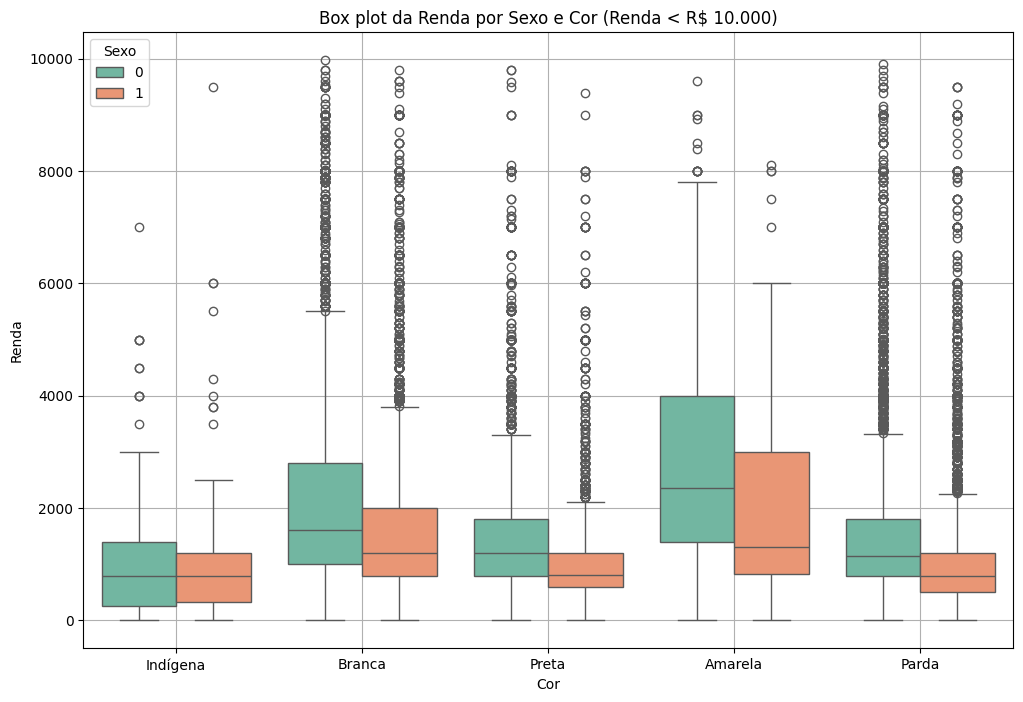

In [26]:
df_filtrado = df[df['Renda'] < 10000]

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_filtrado, x='Cor', y='Renda', hue='Sexo', palette='Set2')
plt.title('Box plot da Renda por Sexo e Cor (Renda < R$ 10.000)')
plt.xlabel('Cor')
plt.ylabel('Renda')
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda'])
plt.legend(title='Sexo')
plt.grid(True)
plt.show()

> ### Conclusões

**Variação na renda entre os grupos de cor:**

É possível observar que a distribuição da renda varia entre os diferentes grupos de cor. Alguns grupos podem apresentar uma dispersão maior de renda do que outros, indicando possíveis disparidades socioeconômicas entre as diferentes etnias representadas na amostra.

**Disparidades de renda entre os sexos:**

Em geral, pode-se notar que a mediana da renda para homens tende a ser maior do que para mulheres em todos os grupos de cor. Isso sugere a presença de uma disparidade de renda entre os sexos, onde os homens tendem a ter uma renda média mais alta do que as mulheres.

**Possíveis outliers:**

Alguns grupos de cor podem apresentar outliers, representados pelos pontos fora dos limites dos "bigodes" do boxplot. Esses outliers podem indicar situações individuais de renda muito alta ou muito baixa dentro desses grupos, que podem ser de interesse para uma investigação mais aprofundada.

**Diferenças na dispersão da renda entre os grupos de cor:**

A dispersão da renda, conforme representada pela amplitude dos "bigodes" do boxplot, pode variar entre os diferentes grupos de cor. Alguns grupos podem ter uma dispersão maior de renda do que outros, o que pode refletir diferenças socioeconômicas dentro da população.

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [27]:
from scipy import stats
percentual = stats.percentileofscore(df['Renda'], 788, kind ='rank', nan_policy='omit' )

percentual

24.390942217595

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [28]:
df['Renda'].quantile(.99)

15000.0

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [29]:
stats_renda = pd.crosstab(df['Anos de Estudo'], df['Sexo'], values=df['Renda'], aggfunc=['mean', 'median', 'max', 'std'])

stats_renda.columns = ['Média Masculino', 'Média Feminino', 'Mediana Masculino', 'Mediana Feminino',
                       'Máximo Masculino', 'Máximo Feminino', 'Desvio Padrão Masculino', 'Desvio Padrão Feminino']
stats_renda

,Média Masculino,Média Feminino,Mediana Masculino,Mediana Feminino,Máximo Masculino,Máximo Feminino,Desvio Padrão Masculino,Desvio Padrão Feminino
Anos de Estudo,,,,,,,,
1,799.494638,516.201748,700,390,30000,10000,1023.904884,639.311534
2,895.629047,492.771987,788,400,30000,2000,1331.950552,425.291842
3,931.178986,529.911638,788,450,40000,4000,1435.173827,498.234168
4,1109.203862,546.853916,800,500,80000,3500,2143.800133,424.124446
5,1302.329283,704.279111,1000,788,50000,10000,1419.821787,629.553397
6,1338.653218,781.389776,1045,788,35000,8000,1484.650587,635.782641
7,1448.875419,833.732824,1200,788,25000,6000,1476.628602,574.547028
8,1465.497940,830.751004,1200,788,40000,9000,1419.708673,602.038029
9,1639.396667,933.615351,1300,800,30000,18000,1515.583715,896.781213


**Diferenças na média de renda entre homens e mulheres:**

Notamos que, em geral, os homens tendem a ter uma média de renda maior do que as mulheres em todos os níveis de escolaridade. Isso é evidenciado pelos valores mais altos nas colunas "Média Masculino" em comparação com "Média Feminino".

**Aumento da renda com a educação:**

Em ambos os sexos, a renda tende a aumentar conforme o nível de escolaridade aumenta. Isso é visível pela tendência de aumento nas médias e medianas de renda à medida que o nível de escolaridade aumenta de 1 até 16 anos de estudo.

**Dispersão da renda:**

O desvio padrão mostra o quão dispersos estão os dados em torno da média. Observamos que, em geral, o desvio padrão é maior para os homens do que para as mulheres em quase todos os níveis de escolaridade. Isso sugere que a renda dos homens tende a ser mais variável do que a das mulheres.

**Níveis extremos de renda:**

Notamos que, em alguns níveis de escolaridade mais altos (por exemplo, 12, 13, 14 e 15 anos), os valores máximos de renda são muito altos. Isso indica que algumas pessoas nessas categorias têm rendas extremamente altas em comparação com a maioria das pessoas em seus grupos de educação.

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

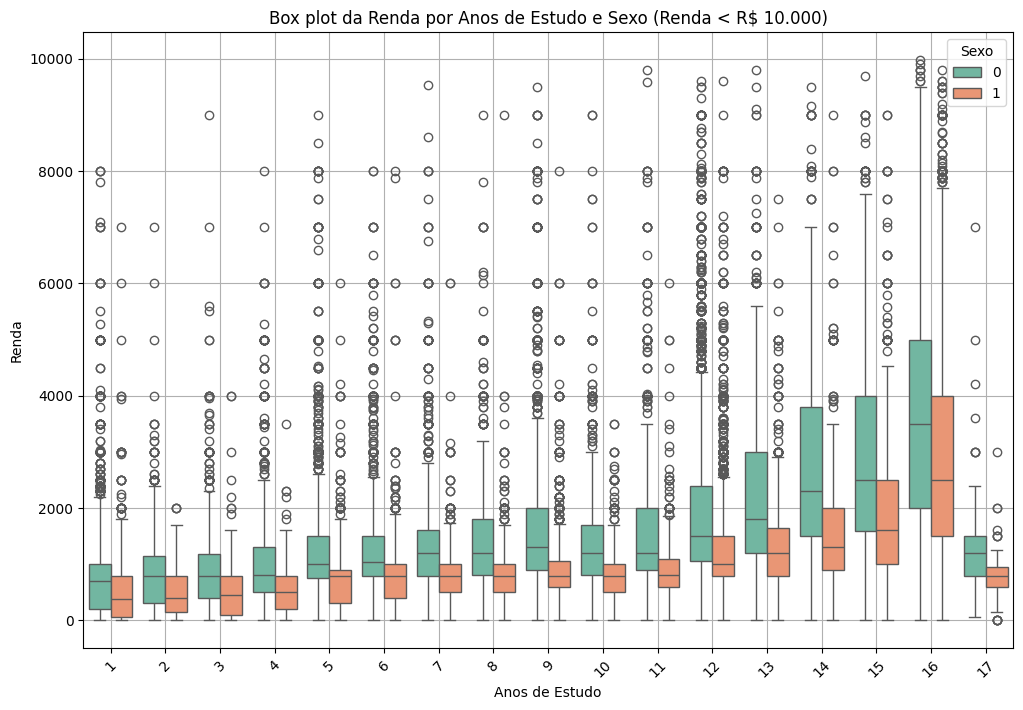

In [30]:
df_filtrado = df[df['Renda'] < 10000]

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_filtrado, x='Anos de Estudo', y='Renda', hue='Sexo', palette='Set2')
plt.title('Box plot da Renda por Anos de Estudo e Sexo (Renda < R$ 10.000)')
plt.xlabel('Anos de Estudo')
plt.ylabel('Renda')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Sexo')
plt.show()

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [34]:
estatisticas_renda_por_uf = df.groupby('UF')['Renda'].agg(['mean', 'median', 'max', 'std'])

estatisticas_renda_por_uf.columns = ['Média Renda', 'Mediana Renda', 'Máximo Renda', 'Desvio Padrão Renda']

estatisticas_renda_por_uf.index = estatisticas_renda_por_uf.index.map(uf)

estatisticas_renda_por_uf.head(60)

,Média Renda,Mediana Renda,Máximo Renda,Desvio Padrão Renda
UF,,,,
Rondônia,1789.761223,1200.0,50000,2406.161161
Acre,1506.091782,900.0,30000,2276.233415
Amazonas,1445.130100,900.0,22000,1757.935591
Roraima,1783.588889,1000.0,20000,2079.659238
Pará,1399.076871,850.0,50000,2053.779555
Amapá,1861.353516,1200.0,15580,2020.688632
Tocantins,1771.094946,1000.0,60000,2934.590741
Maranhão,1019.432009,700.0,30000,1887.816905
Piauí,1074.550784,750.0,40000,2373.355726


### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

<ipython-input-42-6c585cc789fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Nome Estado'] = df_filtrado['UF'].map(uf)


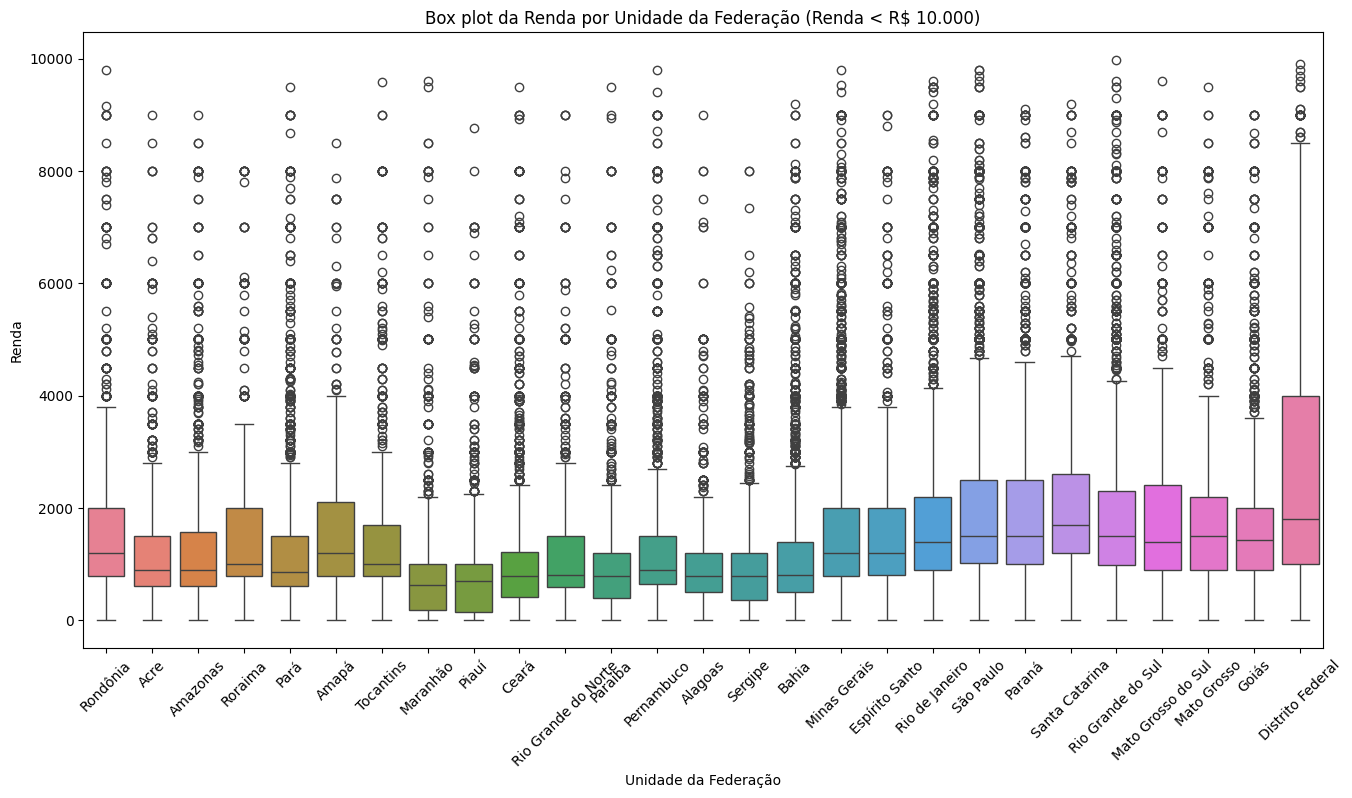

In [42]:
df_filtrado = df[df['Renda'] < 10000]
df_filtrado['Nome Estado'] = df_filtrado['UF'].map(uf)
plt.figure(figsize=(16, 8))
sns.boxplot(x='Nome Estado', y='Renda', data=df_filtrado, hue='Nome Estado', legend=False)
plt.xticks(rotation=45)
plt.title('Box plot da Renda por Unidade da Federação (Renda < R$ 10.000)')
plt.xlabel('Unidade da Federação')
plt.ylabel('Renda')

plt.show()

> ### Conclusões

**Distrito Federal com a maior média e maior terceiro quartil:** Isso sugere que, em média, as pessoas no Distrito Federal têm uma renda mais alta do que em outros estados. Além disso, o terceiro quartil mais alto indica que uma parcela significativa da população do Distrito Federal tem renda relativamente alta.

**São Paulo e Paraná com gráficos semelhantes:** A semelhança nos gráficos de São Paulo e Paraná pode indicar que a distribuição de renda nesses estados é comparativamente uniforme. Isso sugere uma menor disparidade de renda dentro desses estados.

**Maranhão e Piauí com o menor primeiro quartil dos salários:** O menor primeiro quartil nesses estados indica que uma parte significativa da população tem renda mais baixa. Isso sugere uma disparidade de renda maior, com uma proporção maior de pessoas ganhando salários mais baixos em comparação com outros estados.